# Binning data

In [173]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [174]:
def peak(x,height,centre,width):
    '''plots a gaussian'''
    return height*np.exp((-(x-centre)**2)/(2*width**2))

In [175]:
def addnoise(pure):
    '''adds noise'''
    vary = np.random.uniform(0,1,pure.shape)
    signal=-(pure*np.log(vary))
    return signal

In [176]:
def bin_it(yvalues,binsize):
    '''groups an array in groups of a given size then averaging them'''
    N=int(math.ceil(len(yvalues)/binsize))
    #finds number of times code should loop, taking into acount the final group may be smaller than binsize
    C=0
    newy=[] #list for new y array
    while C<N:
        if (C+1)*binsize<len(yvalues): #if the end of the bin is still inside the orignal array
            Q=(np.sum(yvalues[C*binsize:(C+1)*binsize]))/binsize #group of binsize averaged
        else:
            Q=(np.sum(yvalues[C*binsize:len(yvalues)]))/binsize
            #if end of bin would be oustide the array use end of the array as the end of the bin
        newy.append(Q)
        C+=1
    return np.array(newy)

In [177]:
def runsims(noiseheight,binsize1,binsize2,binsize3):
    '''runs the simulations changing both noise height and binsize'''
    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, 4,figsize=(10,6)) #genrates 4 subplots
    y=np.full((1,len(x)),noiseheight) #noise line
    fulldata=addnoise(np.maximum(peak(x,1,1.5,0.5),y[0])) #combines noise line and gaussian, and adds noise
    ax1.plot(x,fulldata,label='full plot') 
    ax1.plot(x,y[0],label='noise height') #noise line
    ax1.plot(x,peak(x,1,1.5,1),label='gaussian') #gaussian peak
    ratio=math.trunc(1/noiseheight) #finds ratio truncates to save space
    ax1.legend()
    ax1.set_xlim(0,3)
    ax1.title.set_text(f'raw data {ratio}') 
    ax2.plot(x[0::binsize1],bin_it(fulldata,binsize1),label='binned data') #bins the data for a given bin size
    ax2.plot(x,peak(x,1,1.5,1),label='gaussian',color='green') #gaussian peak
    k1=2*binsize1 #calculates k
    ax2.set_xlim(0,3)
    ax2.legend(loc='lower center')
    ax2.title.set_text(f'bin size {binsize1} k={k1}')
    ax3.plot(x[0::binsize2],bin_it(fulldata,binsize2),label='binned data') #bins the data for a given bin size
    ax3.plot(x,peak(x,1,1.5,1),label='gaussian',color='green') #gaussian peak
    k2=2*binsize2 #calculates k
    ax3.set_xlim(0,3)
    ax3.legend(loc='lower center')
    ax3.title.set_text(f'bin size {binsize2} k={k2}')
    ax4.plot(x[0::binsize3],bin_it(fulldata,binsize3),label='binned data') #bins the data for a given bin size
    ax4.plot(x,peak(x,1,1.5,1),label='gaussian',color='green') #gaussian peak
    k3=2*binsize3 #calculates k
    ax4.set_xlim(0,3)
    ax4.legend(loc='lower center')
    ax4.title.set_text(f'bin size {binsize3} k={k3}')

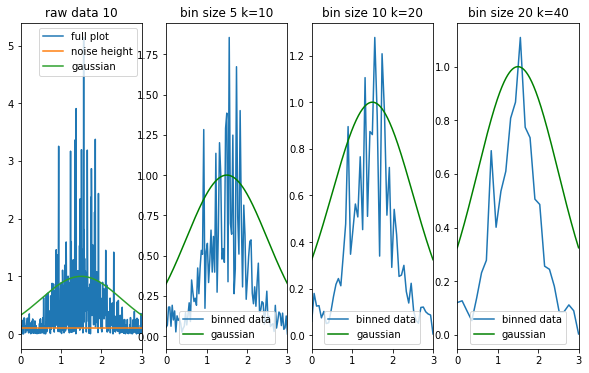

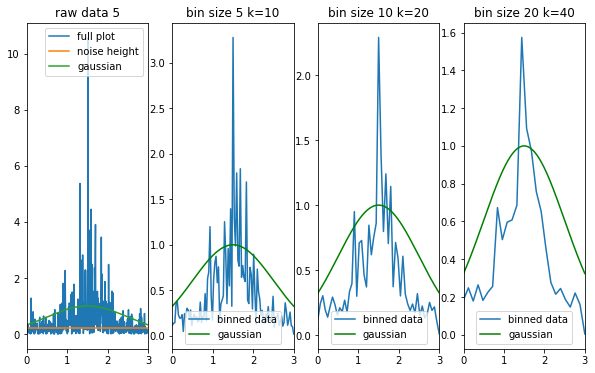

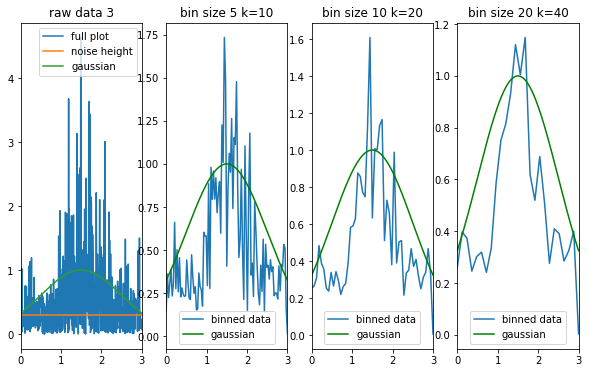

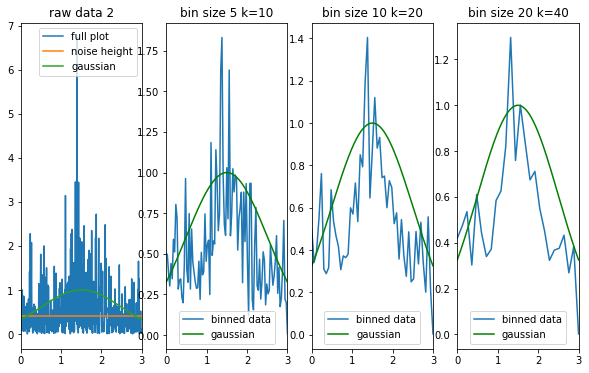

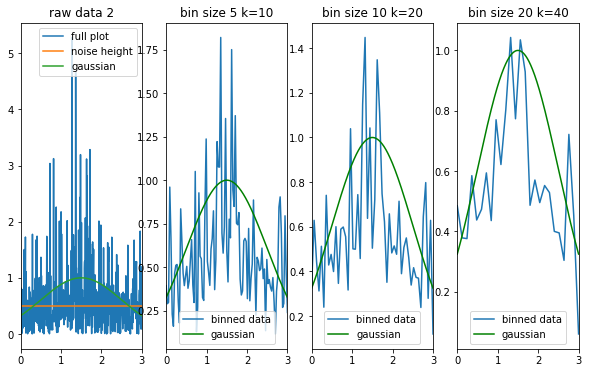

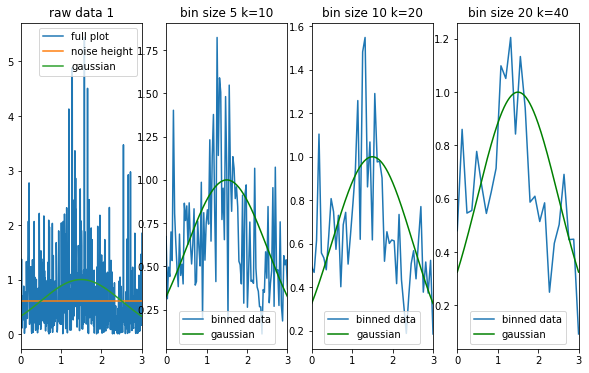

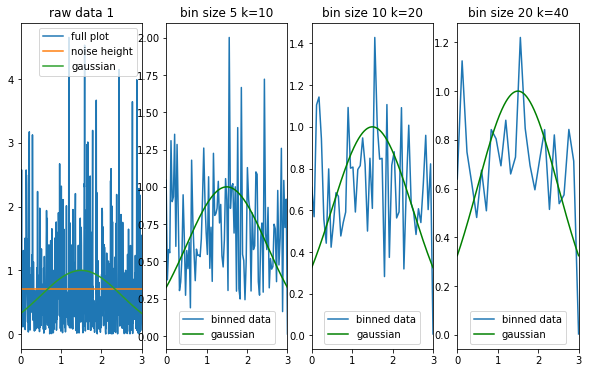

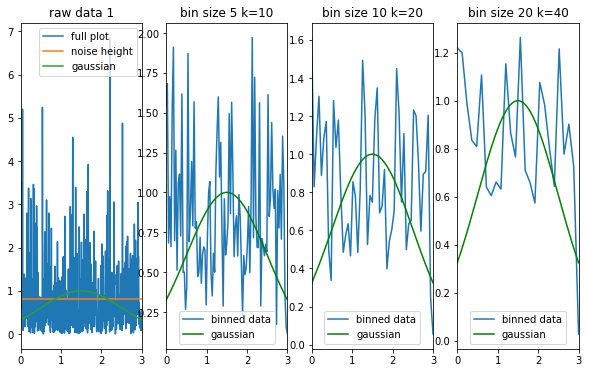

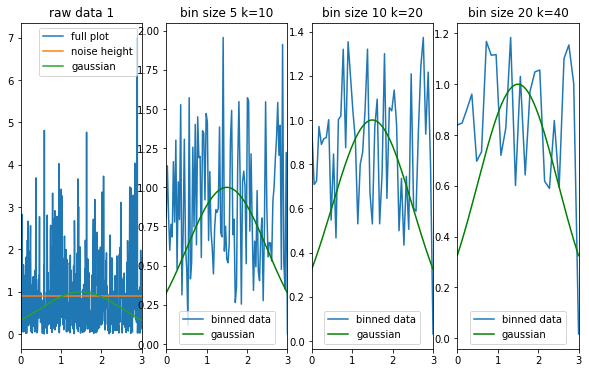

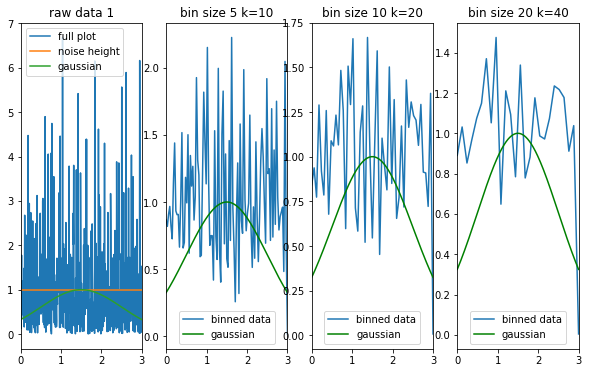

In [178]:
x=np.linspace(0,3,501) #x values
noiseheights=[0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,1] #noiseheights to loop with
for n in noiseheights:
    runsims(n,5,10,20) #loops through the sims at different noise heights